In [ ]:
###############################
#Script for creating survival prediction plots
###############################

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt


In [2]:
#Define cancer types, methods, colors, runs

cancer_types = ['BRCA', 'AML', 
                'COLON', 'LUNG', 
                'BRAIN', 'OV', 
                'SARCOMA', 'KIDNEY', 
                'LIVER', 'STOMACH', 
                'SKIN', 
                'HEAD_NECK', 'PANCREAS',
                'CERVICAL', 'BLADDER']

tcga_types = ['BRCA', 'LAML', 
                'COADREAD', 'LUNG', 
                'GBMLGG', 'OV', 
                'SARC', 'KIPAN', 
                'LIHC', 'STAD', 
                'SKCM', 
                'HNSC', 'PAAD',
                'CESC', 'BLCA']

cancer_names = ['BREAST', 'AML',
                'COLORECTAL', 'LUNG',
                'BRAIN', 'OV', 
                'SARCOMA', 'KIDNEY', 
                'LIVER', 'STOMACH', 
                'MELANOMA', 
                'HEAD&NECK', 'PANCREAS',
                'CERVICAL', 'BLADDER']

cancer_colors = ['#f19066', #BREAST = SAWTOOTH TANK
                 '#778beb', #AML = SOFT BLUE
                '#3dc1d3', #COLON = BLUE CHORACO
                 '#303952', #LUNG = BISCAY
                '#786fa6', #BRAIN = PURPLE MOUNTAIN
                 '#c44569', #OV = DEEP ROSE
                '#e77f67', #SARCOMA = BREWED MUSTARD
                 '#596275', #KIDNEY = PENCIL LEAD
                '#f5cd79', #LIVER = SUMMER TIME
                 '#546de5', #STOMACH = CORN FLOWER
                '#e15f41', #MELANOMA = TIGERLY
                '#cf6a87', #HEADNECK = OLD GRENIUM
                 '#f3a683', #PANCREAS = CREAMY PEACH
                '#63cdda',  #CERVICAL = SQUEAKY
                 '#f8a5c2'] #BLADDER = ROGUE PINK

runs = [np.arange(10) + 1,
        np.zeros(10, dtype=int),
        np.arange(10) + 1,
        np.arange(10),
        np.arange(10),
        np.zeros(10, dtype=int)]

methods = ['RP', 'PCA',
          'ICA', 'AE', 'DAE', 
          'DeepProfile',]



In [3]:
#Read all prediction results from all methods
import os.path
all_results = []

for c in range(len(cancer_types)):
    cancer_type = cancer_types[c]
    tcga_type = tcga_types[c]
    
    print("------------")
    print(cancer_type)
    
    #For each methods, there are 10 different runs
    cancer_results = np.zeros((len(methods), 50))
    
    for m in range(len(methods)):
        method = methods[m]
        
        #Average different runs of the same method
        sub_results = np.zeros((10, 50))
        for r in range(10):

            result_df = pd.read_table('Prediction_Results/' + cancer_type +
                                        '/TCGA_Survival_5year_LR_Balanced_Subsample_20FOLD_50Runs_'
                                         + tcga_type + '_'
                                         + method + '_'
                                         + str(runs[m][r]) + '_ACCs.txt',
                                         index_col = None, header = None)
            print(result_df.shape)
            sub_results[r] = result_df.values.ravel()
                
        cancer_results[m, :] = np.mean(sub_results, axis = 0)
            
    all_results.append(cancer_results)
        
            

------------
BRCA
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
------------
AML
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
-----

In [4]:
#Record all p-values from Wilcoxon test

all_pvalues = []

for c in range(len(cancer_types)):
    cancer_pvalues = np.zeros((6, 6))
    for i in range(6):
        for j in range(6):
            cancer_pvalues[i, j] = stats.wilcoxon(all_results[c][i],all_results[c][j], zero_method = 'zsplit').pvalue
            print(stats.wilcoxon(all_results[c][i],all_results[c][j], zero_method = 'zsplit').pvalue)
    all_pvalues.append(cancer_pvalues)


1.0
0.09023295686870952
0.6958217064526084
7.558547208448979e-05
0.00012195551597611827
0.029850865672202236
0.09023295686870952
1.0
0.13968629574799293
0.907777729432748
0.8205357071723686
0.0026735500793170683
0.6958217064526084
0.13968629574799293
1.0
0.05351729171775116
0.034504200075460616
0.05472575591756767
7.558547208448979e-05
0.907777729432748
0.05351729171775116
1.0
0.5854473671665759
4.257582169941892e-05
0.00012195551597611827
0.8205357071723686
0.034504200075460616
0.5854473671665759
1.0
7.116785406392244e-05
0.029850865672202236
0.0026735500793170683
0.05472575591756767
4.257582169941892e-05
7.116785406392244e-05
1.0
1.0
0.3343721725378376
0.5177663936280261
6.157558352019736e-07
9.788809660285206e-09
4.776369371963985e-09
0.3343721725378376
1.0
0.19581677466495573
0.008052611744925487
0.0036079522176117587
3.9080824545967005e-05
0.5177663936280261
0.19581677466495573
1.0
0.007935033251639132
0.0016487948496279837
4.9686477358462e-06
6.157558352019736e-07
0.0080526117449

0.0008228911164846856
3.845210123934571e-06
1.6298766346044452e-08
2.842125876599103e-08
3.9931296641075576e-05
1.0
5.203107424445259e-06
1.9826047267313123e-08
4.8549627999536944e-09
9.623649648105852e-10
0.0008228911164846856
5.203107424445259e-06
1.0
1.0
1.255880239833224e-07
5.169581004964039e-07
0.06879723488921
0.16302676656020054
0.08226699471261513
1.255880239833224e-07
1.0
0.6851488589292557
3.0061393761139396e-08
1.6835946217322519e-06
8.862337393053468e-07
5.169581004964039e-07
0.6851488589292557
1.0
1.0425749718510449e-07
1.386408945102495e-06
5.171154940867421e-07
0.06879723488921
3.0061393761139396e-08
1.0425749718510449e-07
1.0
0.0002629334260048018
0.26900713253455766
0.16302676656020054
1.6835946217322519e-06
1.386408945102495e-06
0.0002629334260048018
1.0
0.002946364030027681
0.08226699471261513
8.862337393053468e-07
5.171154940867421e-07
0.26900713253455766
0.002946364030027681
1.0
1.0
0.018986918621900824
0.055948286556796865
5.6789437225601964e-05
7.173094962033327

In [12]:
#Create plot
def createPlot(i):

    N = 50
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 20)

    SMALL_SIZE = 30
    MEDIUM_SIZE = 40
    BIGGER_SIZE = 50

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    all_counts_bigger = 0
    all_counts_smaller = 0
    sig_counts_bigger = 0
    sig_counts_smaller = 0
    
    label_created = np.zeros(len(cancer_types))
    for c in range(len(cancer_types)):
        
        if label_created[c] == 0:
            plt.scatter(0, 0, marker = "o", s = 1500, color = cancer_colors[c], 
                                    alpha = 0.8, label = cancer_names[c])
            label_created[c] = 1
            
        for n in range(6):
            if i != n:
                pvalue = all_pvalues[c][i, n]
                pvalue = -1 * np.log10(pvalue)
                if pvalue > -1 * np.log10(0.05):
                    plt.scatter(np.mean(all_results[c][n]), np.mean(all_results[c][i]), 
                                        s = 1000 * pvalue, marker = "o", color = cancer_colors[c], 
                                        alpha = 0.8) 
                    plt.scatter(np.mean(all_results[c][n]), np.mean(all_results[c][i]), 
                                color = '#222f3e', s = 100, marker='*', zorder = 100)

                    if np.mean(all_results[c][i]) > np.mean(all_results[c][n]):
                        sig_counts_bigger = sig_counts_bigger + 1
                    else:
                        sig_counts_smaller = sig_counts_smaller + 1                                   
                else:
                    plt.scatter(np.mean(all_results[c][n]), np.mean(all_results[c][i]), 
                                        s = 1000 * pvalue, marker = "o", color = cancer_colors[c], 
                                        alpha = 0.8)  
                if np.mean(all_results[c][i]) > np.mean(all_results[c][n]):
                    all_counts_bigger = all_counts_bigger + 1
                else:
                    all_counts_smaller = all_counts_smaller + 1  

    min_value = 0.43
    max_value = 0.72
    plt.plot([min_value, max_value], [min_value, max_value], color = 'black', linewidth = 5)
    plt.xlim([min_value, max_value])
    plt.ylim([min_value, max_value])
    
    print("all_counts_bigger", all_counts_bigger)
    print("all_counts_smaller", all_counts_smaller)
    print("sig_counts_bigger", sig_counts_bigger)
    print("sig_counts_smaller", sig_counts_smaller)
    
    print("PERCENT ALL ", all_counts_bigger/(all_counts_bigger + all_counts_smaller))
    print("PERCENT SIGNIFICANT ", sig_counts_bigger/(sig_counts_bigger + sig_counts_smaller))
    
    plt.box(False)
    plt.gca().set_axisbelow(True)
    plt.grid(True, linewidth = 1.5)
    plt.show()
        

all_counts_bigger 29
all_counts_smaller 46
sig_counts_bigger 19
sig_counts_smaller 34
PERCENT ALL  0.38666666666666666
PERCENT SIGNIFICANT  0.3584905660377358


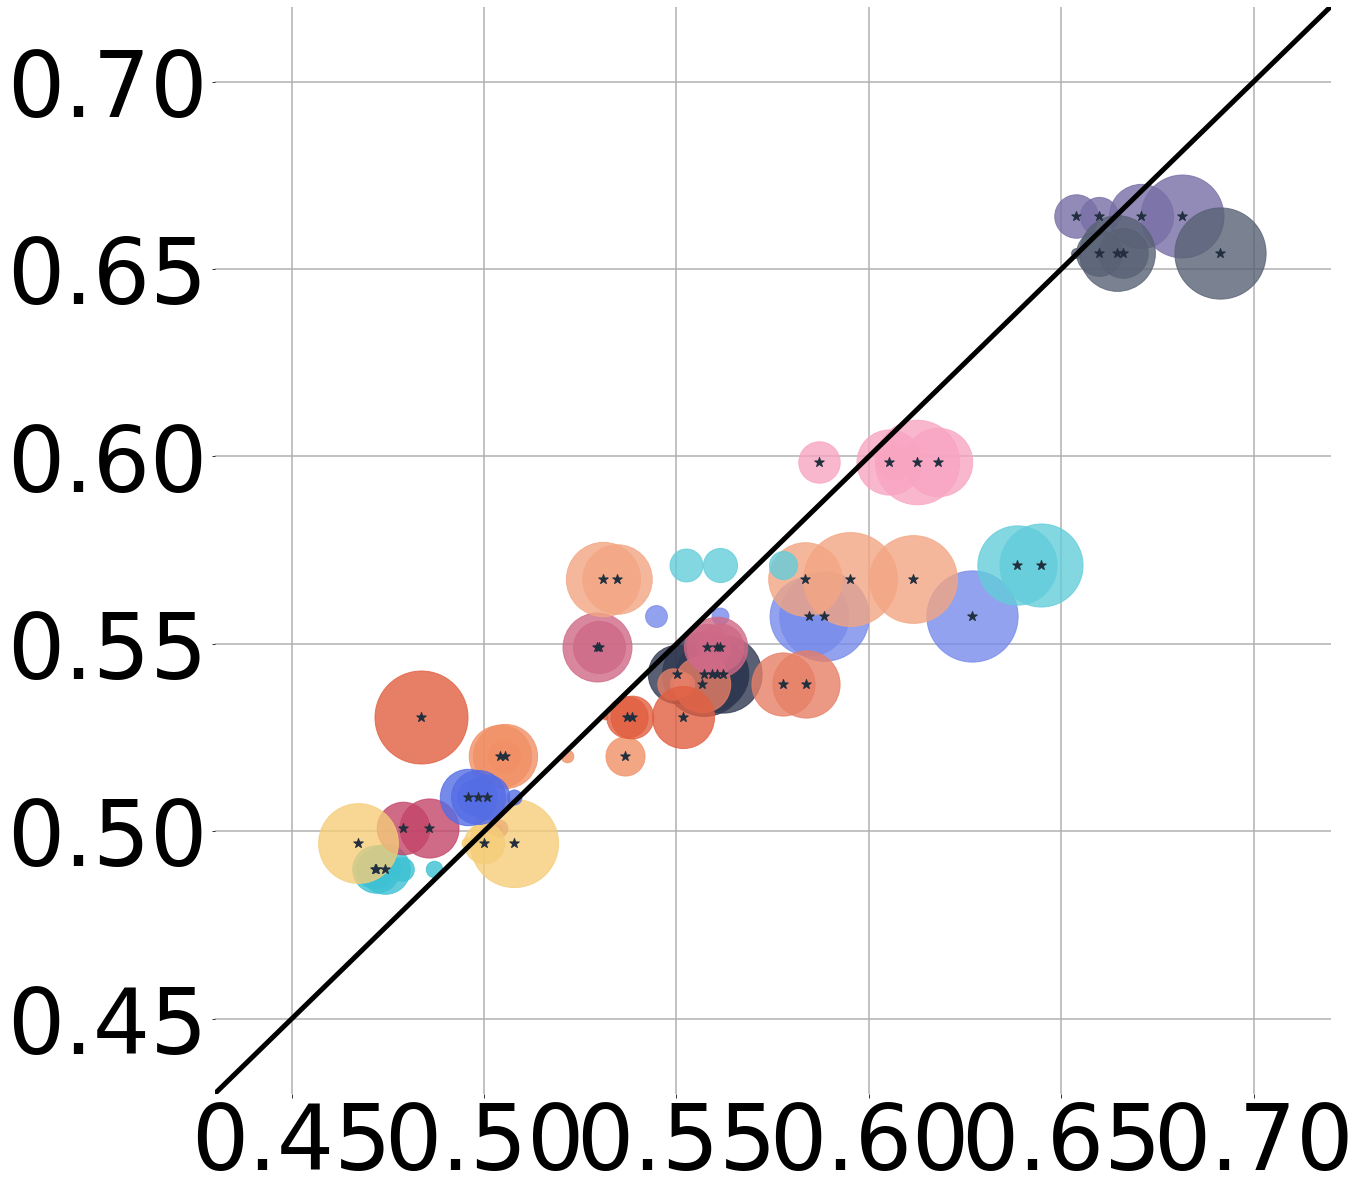

all_counts_bigger 23
all_counts_smaller 52
sig_counts_bigger 13
sig_counts_smaller 36
PERCENT ALL  0.30666666666666664
PERCENT SIGNIFICANT  0.2653061224489796


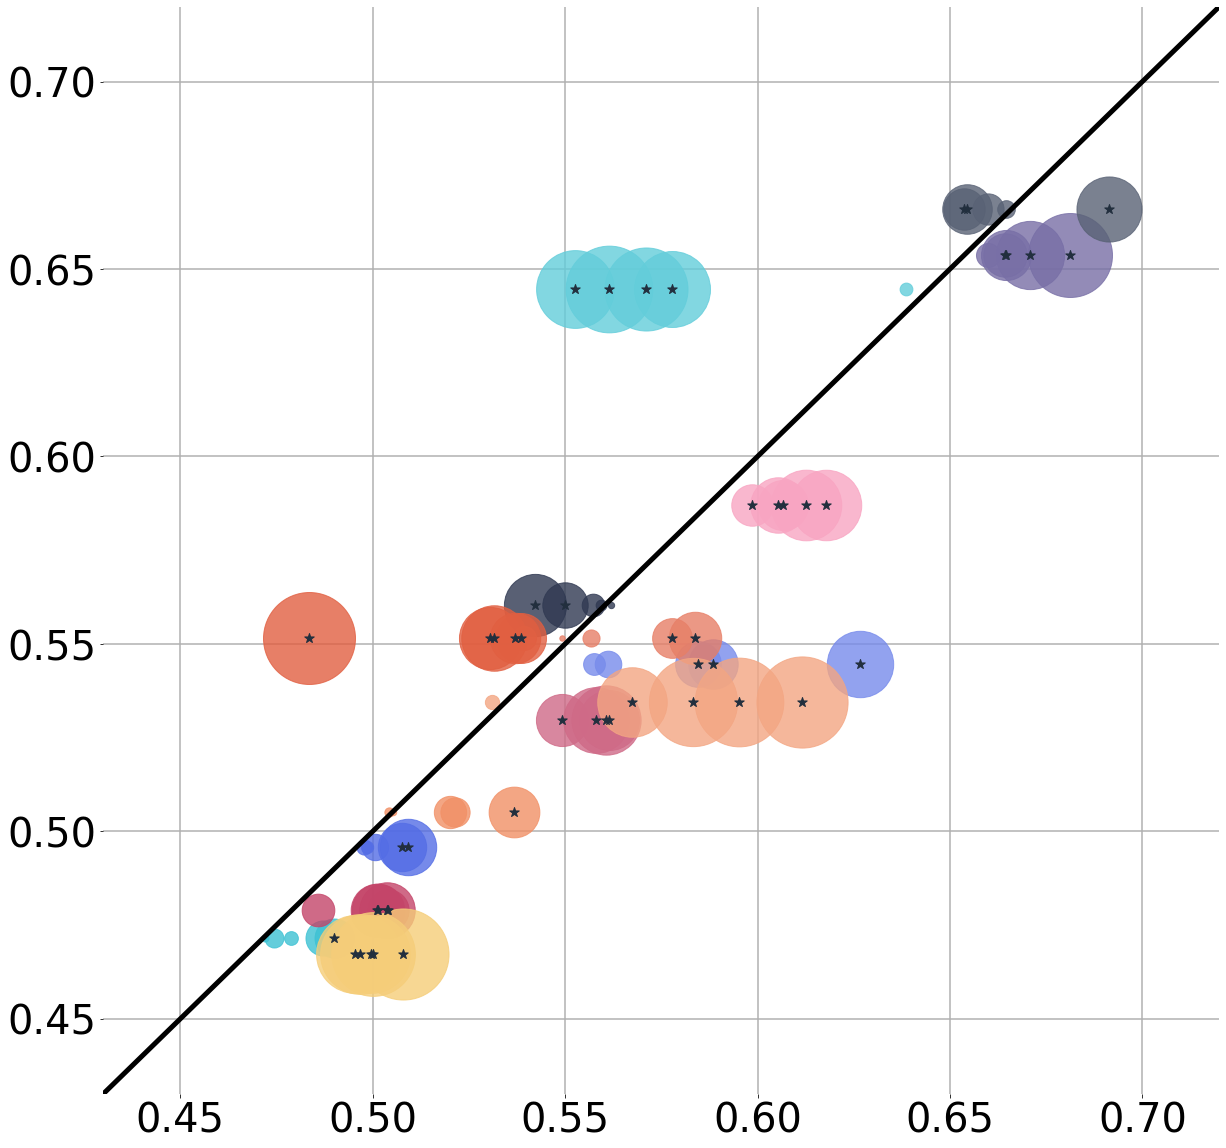

all_counts_bigger 33
all_counts_smaller 42
sig_counts_bigger 19
sig_counts_smaller 27
PERCENT ALL  0.44
PERCENT SIGNIFICANT  0.41304347826086957


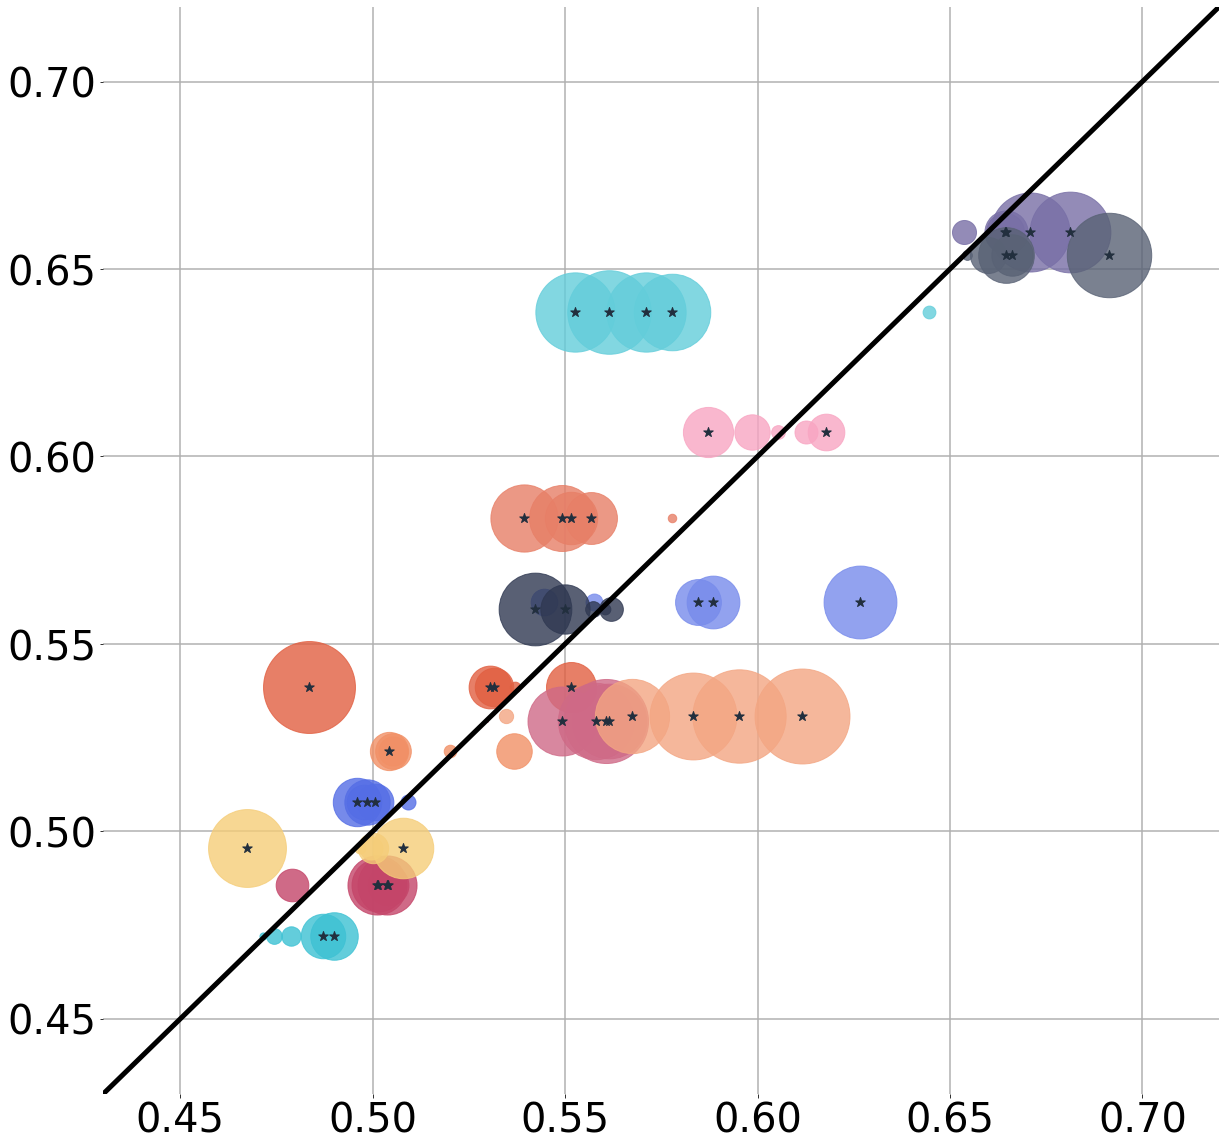

all_counts_bigger 39
all_counts_smaller 36
sig_counts_bigger 26
sig_counts_smaller 26
PERCENT ALL  0.52
PERCENT SIGNIFICANT  0.5


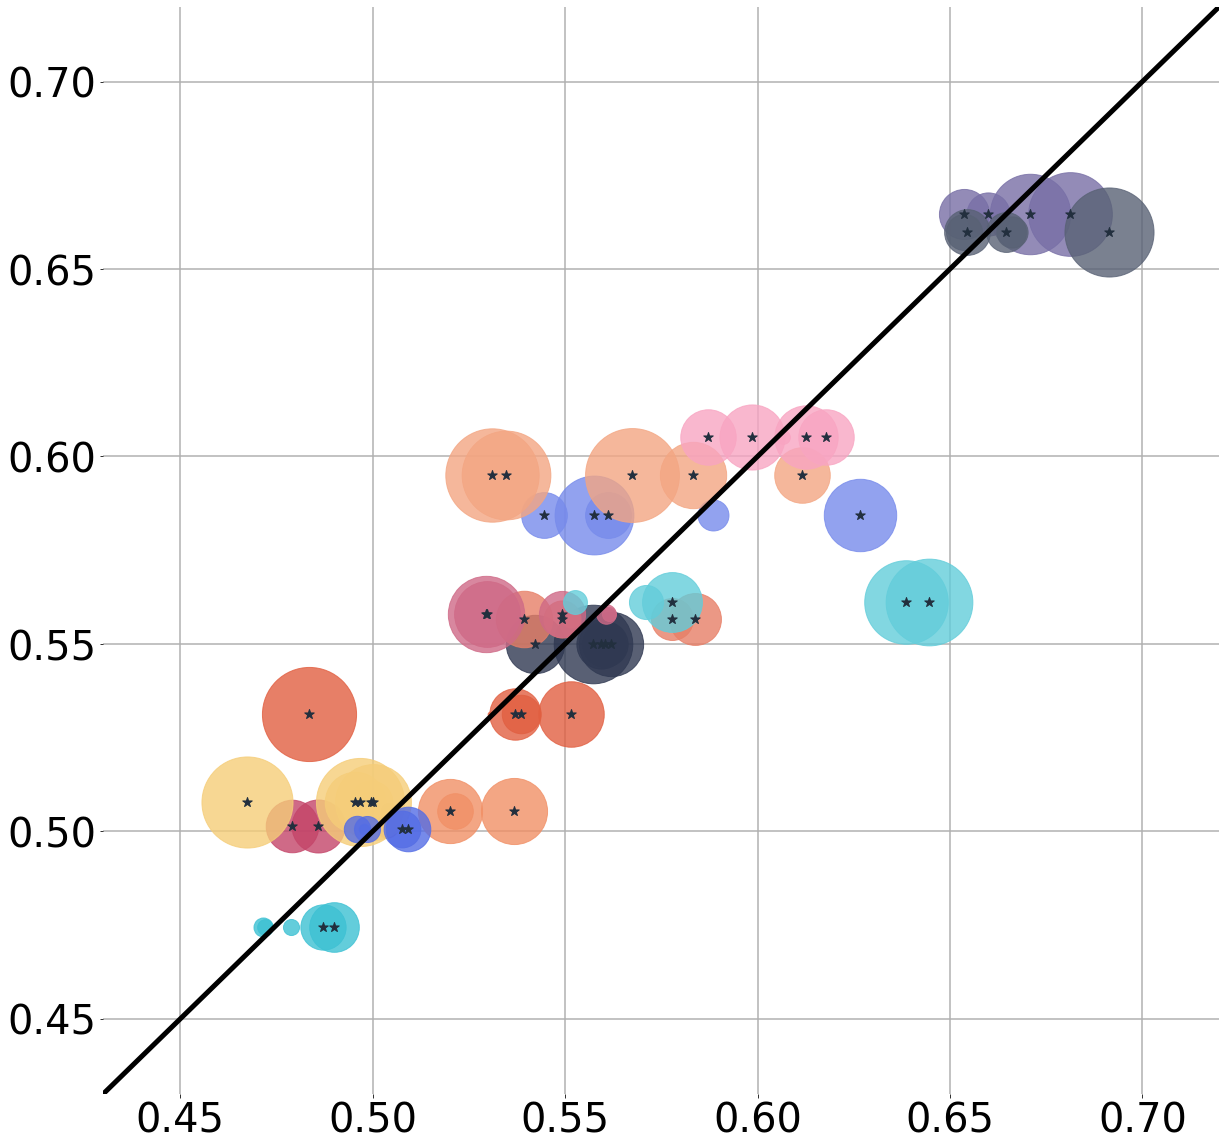

all_counts_bigger 45
all_counts_smaller 30
sig_counts_bigger 32
sig_counts_smaller 18
PERCENT ALL  0.6
PERCENT SIGNIFICANT  0.64


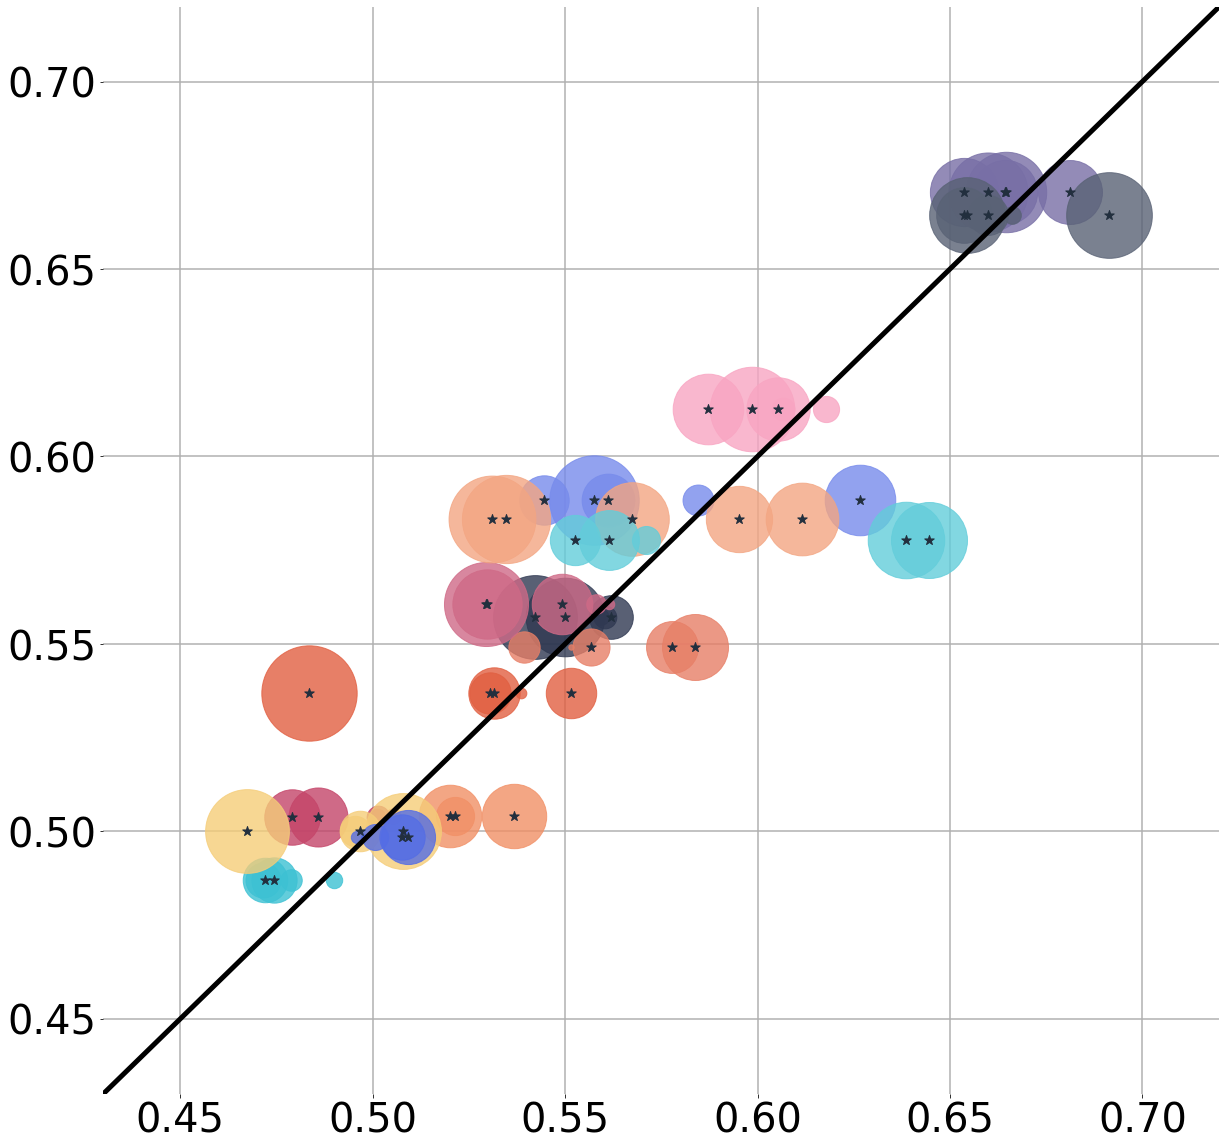

all_counts_bigger 56
all_counts_smaller 19
sig_counts_bigger 41
sig_counts_smaller 9
PERCENT ALL  0.7466666666666667
PERCENT SIGNIFICANT  0.82


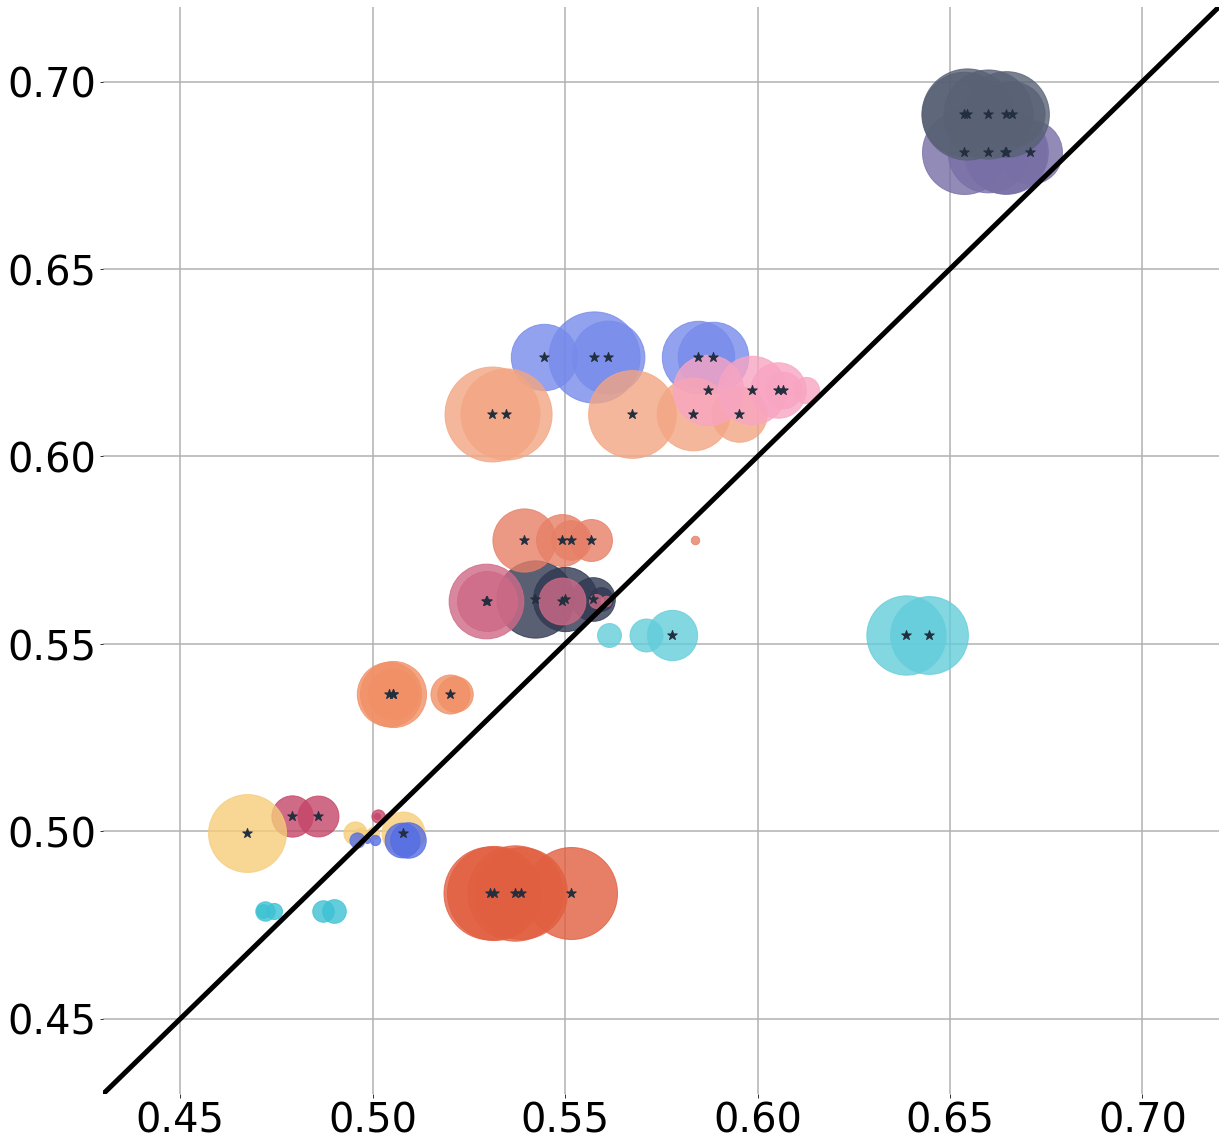

In [13]:
for i in range(6):
    createPlot(i)

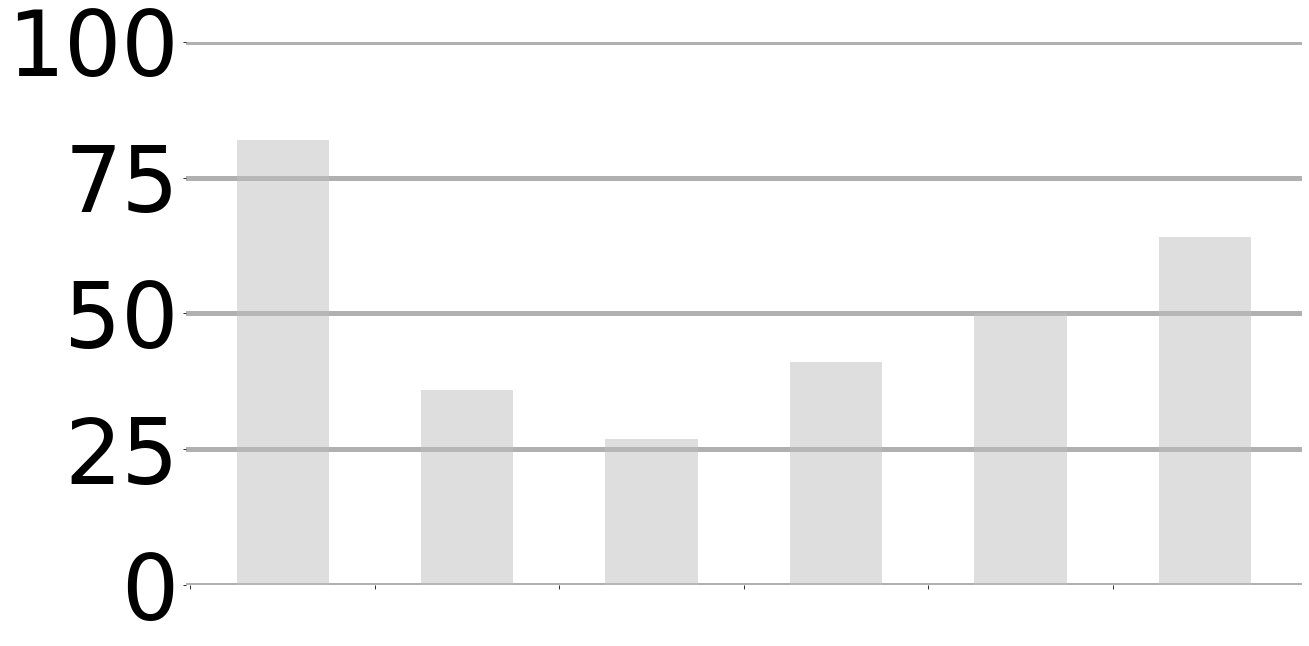

In [11]:
#Create plot for summarizing the results

fig = plt.gcf()
fig.set_size_inches(20, 10)

SMALL_SIZE = 80
MEDIUM_SIZE = 90
BIGGER_SIZE = 100

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = ['#e55039', '#6a89cc', '#f6b93b', '#38ada9', '#fa983a',  '#82ccdd']
method_names = ['DeepProfile', 'RP', 'PCA', 'ICA', 'AE', 'DAE']
       
percents = [82, 36, 27, 41, 50, 64]


#plt.scatter(np.arange(6), percents, s = 5000, color = colors, alpha = 0.7)
plt.bar(np.arange(6), percents, color = '#BFBFBF', lw = 200, alpha = 0.5, width = 0.5)

    
#plt.ylabel('Survival prediction accuracy')
plt.xticks(np.arange(6) -.5, [])
plt.yticks(np.arange(0, 120, step = 25))     
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(linewidth = 5)

plt.box(False)
plt.show()



In [1]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count = 41, 
                  nobs = 50, 
                  value = 0.5, 
                  alternative = 'larger')


/homes/gws/abdincer/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(5.889681390658481, 1.934704432910754e-09)